In [201]:
import matplotlib.pyplot as plt
import ast
import json
import numpy as np
import sys
import statistics
from scipy import stats
import collections

RAN_GTEX = "./../gtex_hallmark_random.log"
NR_ACC_GTEX= "../logs/gtex_v7_hallmark_results.log"
NR_ACC_PAN = "../logs/panTCGA_hallmark_results.log"
RAN_PAN = "../panTCGA_hallmark_random.log"

In [202]:
#Get Accuracies
accurs = {}
with open(NR_ACC_GTEX, "r") as f:
            for line in f:
                line = line.split('\t')
                accurs[line[0]] = float(line[1])

In [203]:
od = collections.OrderedDict(sorted(accurs.items()))
od.values()
od

OrderedDict([('HALLMARK_ADIPOGENESIS', 0.888105),
             ('HALLMARK_ALLOGRAFT_REJECTION', 0.891815),
             ('HALLMARK_ANDROGEN_RESPONSE', 0.874087),
             ('HALLMARK_ANGIOGENESIS', 0.849759),
             ('HALLMARK_APICAL_JUNCTION', 0.90623),
             ('HALLMARK_APICAL_SURFACE', 0.797423),
             ('HALLMARK_APOPTOSIS', 0.8936),
             ('HALLMARK_BILE_ACID_METABOLISM', 0.873888),
             ('HALLMARK_CHOLESTEROL_HOMEOSTASIS', 0.862872),
             ('HALLMARK_COAGULATION', 0.893458),
             ('HALLMARK_COMPLEMENT', 0.911498),
             ('HALLMARK_DNA_REPAIR', 0.852535),
             ('HALLMARK_E2F_TARGETS', 0.890569),
             ('HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION', 0.917757),
             ('HALLMARK_ESTROGEN_RESPONSE_EARLY', 0.919994),
             ('HALLMARK_ESTROGEN_RESPONSE_LATE', 0.91804),
             ('HALLMARK_FATTY_ACID_METABOLISM', 0.89207),
             ('HALLMARK_G2M_CHECKPOINT', 0.903285),
             ('HALLMARK_G

In [204]:
#Get Gene Counts
with open("../logs/hallmark_gene_counts.json") as f:
    gene_count_dict = json.load(f)

In [205]:
datasets = list(sorted(gene_count_dict.keys()))


In [206]:
gene_counts = []
for key in datasets:
    gene_counts.append(gene_count_dict[key])

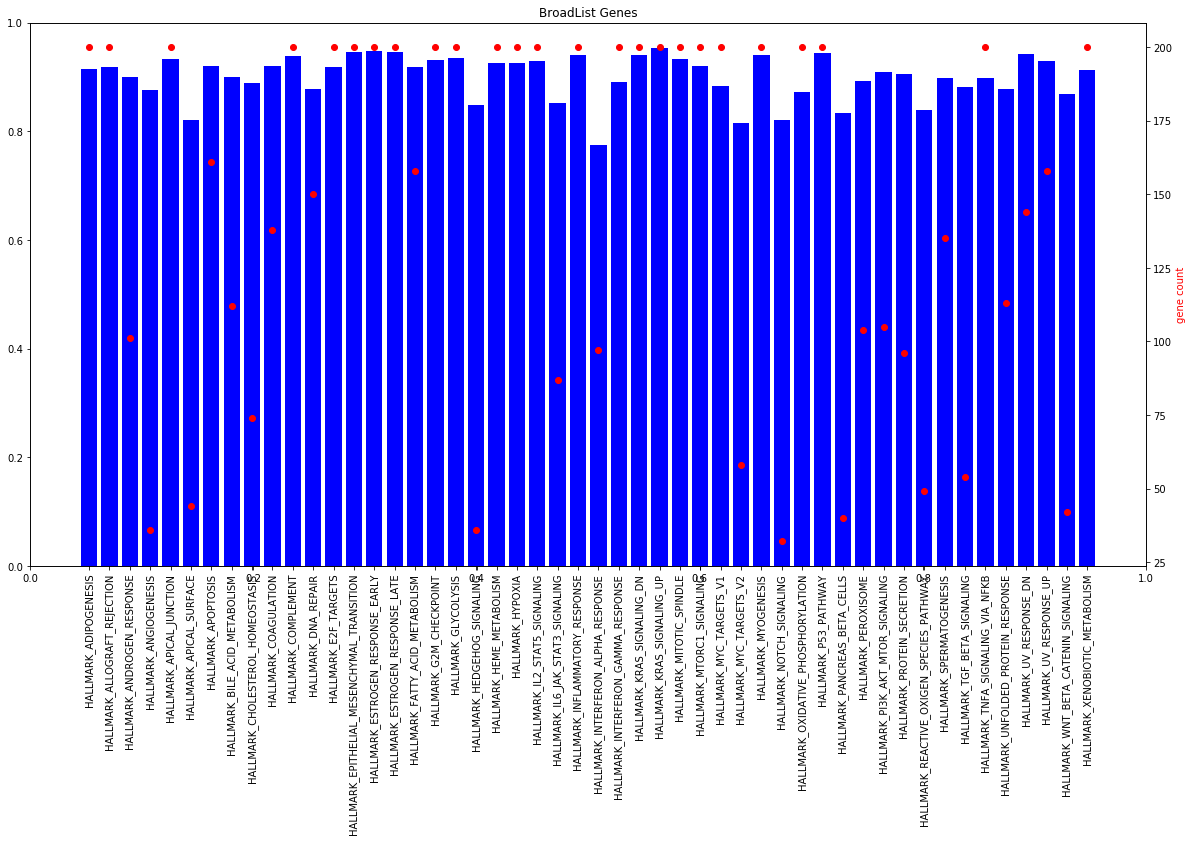

In [207]:
plt.clf()
x = np.arange(len(datasets))

fig = plt.figure(figsize=(20,10))
plt.title("BroadList Genes") 
plt.xticks(x,datasets)
plt.xticks(rotation=90)

ax1 = fig.add_subplot(111)
ax1.get_yaxis().set_visible(False)
ax2=fig.add_subplot(111, frame_on=False)

ax1.bar(x, od.values(), color='b')
ax1.set_ylabel('accuracy',color='b')

ax2 = ax1.twinx()
ax2.scatter(x, gene_counts, color='r')
ax2.yaxis.tick_right()
ax2.xaxis.tick_bottom()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('gene count', color='r')

plt.show()

In [208]:
#Get Accuracies
accurs_r = {}
with open(RAN_GTEX, "r") as f:
            for line in f:
                line = line.split('\t')
                accurs_r[line[0]] = float(line[1])

In [209]:
accurs_r

{'101': 0.810025,
 '104': 0.813764,
 '105': 0.801501,
 '112': 0.810818,
 '113': 0.822826,
 '135': 0.822883,
 '138': 0.831464,
 '144': 0.832087,
 '150': 0.820447,
 '158': 0.843953,
 '161': 0.835967,
 '200': 0.84925,
 '32': 0.653922,
 '36': 0.666893,
 '40': 0.726281,
 '42': 0.711158,
 '44': 0.691249,
 '49': 0.660323,
 '54': 0.738006,
 '58': 0.735571,
 '74': 0.757462,
 '87': 0.76375,
 '96': 0.805976,
 '97': 0.797225}

In [210]:
gene_count_dict

{'HALLMARK_ADIPOGENESIS': 200,
 'HALLMARK_ALLOGRAFT_REJECTION': 200,
 'HALLMARK_ANDROGEN_RESPONSE': 101,
 'HALLMARK_ANGIOGENESIS': 36,
 'HALLMARK_APICAL_JUNCTION': 200,
 'HALLMARK_APICAL_SURFACE': 44,
 'HALLMARK_APOPTOSIS': 161,
 'HALLMARK_BILE_ACID_METABOLISM': 112,
 'HALLMARK_CHOLESTEROL_HOMEOSTASIS': 74,
 'HALLMARK_COAGULATION': 138,
 'HALLMARK_COMPLEMENT': 200,
 'HALLMARK_DNA_REPAIR': 150,
 'HALLMARK_E2F_TARGETS': 200,
 'HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION': 200,
 'HALLMARK_ESTROGEN_RESPONSE_EARLY': 200,
 'HALLMARK_ESTROGEN_RESPONSE_LATE': 200,
 'HALLMARK_FATTY_ACID_METABOLISM': 158,
 'HALLMARK_G2M_CHECKPOINT': 200,
 'HALLMARK_GLYCOLYSIS': 200,
 'HALLMARK_HEDGEHOG_SIGNALING': 36,
 'HALLMARK_HEME_METABOLISM': 200,
 'HALLMARK_HYPOXIA': 200,
 'HALLMARK_IL2_STAT5_SIGNALING': 200,
 'HALLMARK_IL6_JAK_STAT3_SIGNALING': 87,
 'HALLMARK_INFLAMMATORY_RESPONSE': 200,
 'HALLMARK_INTERFERON_ALPHA_RESPONSE': 97,
 'HALLMARK_INTERFERON_GAMMA_RESPONSE': 200,
 'HALLMARK_KRAS_SIGNALING_DN': 200

In [216]:
rand_data = {}
for hallmark in accurs.keys():
        num_genes=gene_count_dict[hallmark]
        rand_data[hallmark] = accurs_r[str(num_genes)]
        
        
od2= collections.OrderedDict(sorted(rand_data.items()))
rand_accurs_list = list(od2.values())    

In [218]:
od2.values()

odict_values([0.84925, 0.84925, 0.810025, 0.666893, 0.84925, 0.691249, 0.835967, 0.810818, 0.757462, 0.831464, 0.84925, 0.820447, 0.84925, 0.84925, 0.84925, 0.84925, 0.843953, 0.84925, 0.84925, 0.666893, 0.84925, 0.84925, 0.84925, 0.76375, 0.84925, 0.797225, 0.84925, 0.84925, 0.84925, 0.84925, 0.84925, 0.84925, 0.735571, 0.84925, 0.653922, 0.84925, 0.84925, 0.726281, 0.813764, 0.801501, 0.805976, 0.660323, 0.822883, 0.738006, 0.84925, 0.822826, 0.832087, 0.843953, 0.711158, 0.84925])

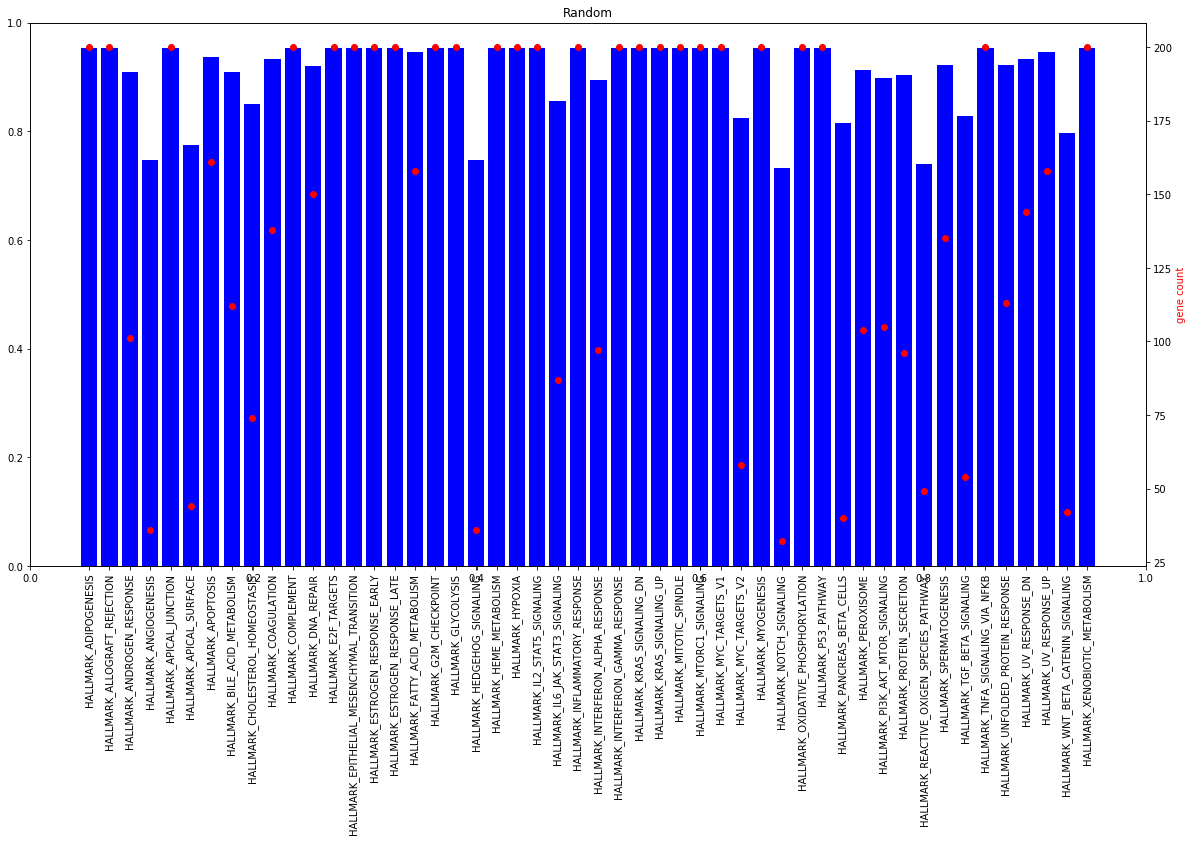

In [219]:
plt.clf()

x = np.arange(len(datasets))

fig = plt.figure(figsize=(20,10))
plt.title("Random") 
plt.xticks(x,datasets)
plt.xticks(rotation=90)

ax1 = fig.add_subplot(111)
ax1.get_yaxis().set_visible(False)
ax2=fig.add_subplot(111, frame_on=False)

ax1.bar(x, od2.values(), color='b')
ax1.set_ylabel('accuracy',color='b')

ax2 = ax1.twinx()
ax2.scatter(x, gene_counts, color='r')
ax2.yaxis.tick_right()
ax2.xaxis.tick_bottom()
ax2.yaxis.set_label_position('right') 
ax2.set_ylabel('gene count', color='r')

plt.show()

In [220]:
accurs_list = list(od.values())
od2= collections.OrderedDict(sorted(rand_data.items()))
rand_accurs_list = list(od2.values())

In [221]:
od

OrderedDict([('HALLMARK_ADIPOGENESIS', 0.888105),
             ('HALLMARK_ALLOGRAFT_REJECTION', 0.891815),
             ('HALLMARK_ANDROGEN_RESPONSE', 0.874087),
             ('HALLMARK_ANGIOGENESIS', 0.849759),
             ('HALLMARK_APICAL_JUNCTION', 0.90623),
             ('HALLMARK_APICAL_SURFACE', 0.797423),
             ('HALLMARK_APOPTOSIS', 0.8936),
             ('HALLMARK_BILE_ACID_METABOLISM', 0.873888),
             ('HALLMARK_CHOLESTEROL_HOMEOSTASIS', 0.862872),
             ('HALLMARK_COAGULATION', 0.893458),
             ('HALLMARK_COMPLEMENT', 0.911498),
             ('HALLMARK_DNA_REPAIR', 0.852535),
             ('HALLMARK_E2F_TARGETS', 0.890569),
             ('HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION', 0.917757),
             ('HALLMARK_ESTROGEN_RESPONSE_EARLY', 0.919994),
             ('HALLMARK_ESTROGEN_RESPONSE_LATE', 0.91804),
             ('HALLMARK_FATTY_ACID_METABOLISM', 0.89207),
             ('HALLMARK_G2M_CHECKPOINT', 0.903285),
             ('HALLMARK_G

In [222]:
od2

OrderedDict([('HALLMARK_ADIPOGENESIS', 0.84925),
             ('HALLMARK_ALLOGRAFT_REJECTION', 0.84925),
             ('HALLMARK_ANDROGEN_RESPONSE', 0.810025),
             ('HALLMARK_ANGIOGENESIS', 0.666893),
             ('HALLMARK_APICAL_JUNCTION', 0.84925),
             ('HALLMARK_APICAL_SURFACE', 0.691249),
             ('HALLMARK_APOPTOSIS', 0.835967),
             ('HALLMARK_BILE_ACID_METABOLISM', 0.810818),
             ('HALLMARK_CHOLESTEROL_HOMEOSTASIS', 0.757462),
             ('HALLMARK_COAGULATION', 0.831464),
             ('HALLMARK_COMPLEMENT', 0.84925),
             ('HALLMARK_DNA_REPAIR', 0.820447),
             ('HALLMARK_E2F_TARGETS', 0.84925),
             ('HALLMARK_EPITHELIAL_MESENCHYMAL_TRANSITION', 0.84925),
             ('HALLMARK_ESTROGEN_RESPONSE_EARLY', 0.84925),
             ('HALLMARK_ESTROGEN_RESPONSE_LATE', 0.84925),
             ('HALLMARK_FATTY_ACID_METABOLISM', 0.843953),
             ('HALLMARK_G2M_CHECKPOINT', 0.84925),
             ('HALLMARK_GLYCO

In [223]:
accur_diff = [abs(accurs_list[i] - rand_accurs_list[i]) for i in range(len(od))]
accur_diff

[0.038855000000000084,
 0.042565000000000075,
 0.06406199999999995,
 0.18286600000000008,
 0.05698000000000003,
 0.10617399999999999,
 0.057632999999999934,
 0.06306999999999996,
 0.10541,
 0.061993999999999994,
 0.06224800000000008,
 0.032088000000000005,
 0.041319000000000106,
 0.0685070000000001,
 0.07074400000000003,
 0.06879000000000002,
 0.048117000000000076,
 0.054035000000000055,
 0.057434000000000096,
 0.15587700000000004,
 0.04964500000000005,
 0.04831400000000008,
 0.05344000000000004,
 0.06380599999999992,
 0.06287100000000001,
 0.04525699999999999,
 0.014953000000000105,
 0.06290000000000007,
 0.075106,
 0.05647100000000005,
 0.04457600000000006,
 0.008666000000000063,
 0.055055000000000076,
 0.06295600000000001,
 0.14188699999999999,
 0.0020959999999999868,
 0.06644000000000005,
 0.08230000000000004,
 0.05227999999999999,
 0.08020399999999994,
 0.07295299999999993,
 0.15403600000000006,
 0.04879599999999995,
 0.11837999999999993,
 0.02276900000000004,
 0.03002000000000004

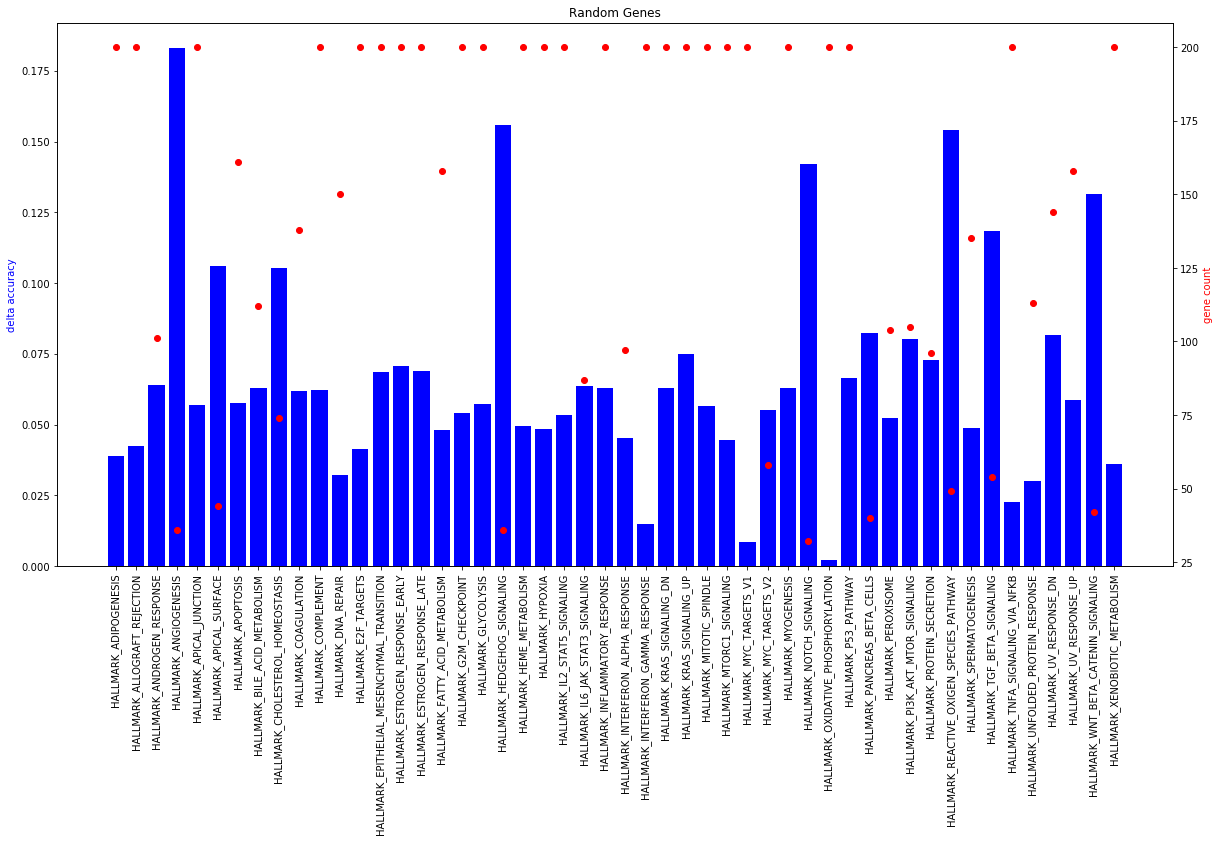

In [224]:
accur_diff = [abs(accurs_list[i] - rand_accurs_list[i]) for i in range(len(od))]
fig = plt.figure(figsize=(20,10))
plt.title("Random Genes") 
plt.xticks(x,datasets)
plt.xticks(rotation=90)

ax3 = fig.add_subplot(111)
ax4=fig.add_subplot(111)

ax3.bar(x,accur_diff, color='b')
ax3.set_ylabel('delta accuracy',color='b')

ax4 = ax3.twinx()
ax4.scatter(x, gene_counts, color='r')
ax4.yaxis.tick_right()
ax4.xaxis.tick_bottom()
ax4.yaxis.set_label_position('right') 
ax4.set_ylabel('gene count', color='r')

plt.show()
